🎧 音频长度: 13.66 秒
🔍 原始 mel 全 0 行数量: 4 / 92
⚠️ 行索引（mel bin）为: [ 4  9 14 19]
🧪 归一化后近似 0 行数量: 4 / 92
⚠️ 行索引（mel bin）为: [ 4  9 14 19]
📊 黑线占比（行级）：4.35%


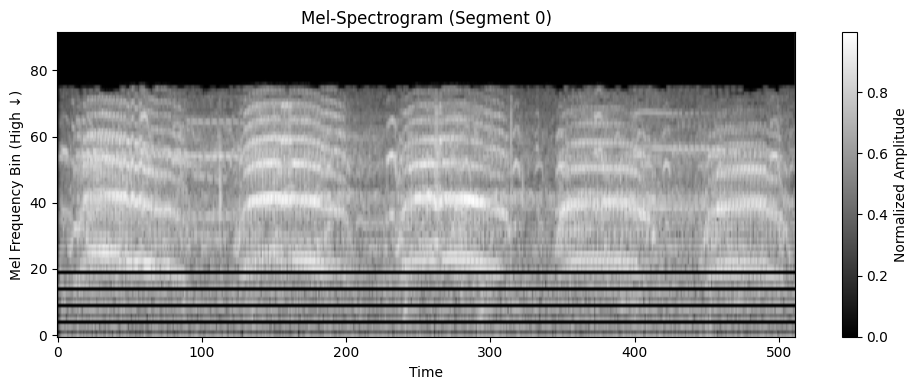

In [15]:
import numpy as np
import librosa
import cv2
import matplotlib.pyplot as plt
import os

# ✅ 设置 WAV 文件路径
wav_path = "E:/AMR/DA/Projekt/data/Audio_files/Alarm call - Black-headed Gull/XC106520.wav"

# ✅ 配置参数
FS = 48000
N_FFT = 512
WIN_SIZE = 512
WIN_LAP = 384
FMIN = 150
FMAX = 15000
DURATION = 3
SPEC_SIZE = (512, 92)

# ✅ 加载音频
if not os.path.exists(wav_path):
    raise FileNotFoundError(f"❌ 未找到音频: {wav_path}")
audio_data, _ = librosa.load(wav_path, sr=FS)
print(f"🎧 音频长度: {len(audio_data)/FS:.2f} 秒")

# ✅ 截取前 3 秒
segment_audio = audio_data[:DURATION * FS]

# ✅ 生成 mel 频谱图（未归一化）
mel = librosa.feature.melspectrogram(
    y=segment_audio,
    sr=FS,
    n_fft=N_FFT,
    hop_length=N_FFT - WIN_LAP,
    win_length=WIN_SIZE,
    window='hann',
    n_mels=SPEC_SIZE[1],
    fmin=FMIN,
    fmax=FMAX
)

# ✅ 检测原始 mel 中的全 0 行
raw_zero_mask = np.all(mel == 0, axis=1)
raw_zero_rows = np.where(raw_zero_mask)[0]
print(f"🔍 原始 mel 全 0 行数量: {len(raw_zero_rows)} / {mel.shape[0]}")
if len(raw_zero_rows) > 0:
    print(f"⚠️ 行索引（mel bin）为: {raw_zero_rows}")

# ✅ 对数变换 + 归一化（常规处理）
mel = np.log10(mel + 1e-9)
mel -= mel.min()
mel /= mel.max()

# ✅ 检测归一化后“近似为 0”的行
near_zero_mask = np.all(mel < 1e-4, axis=1)
near_zero_rows = np.where(near_zero_mask)[0]
print(f"🧪 归一化后近似 0 行数量: {len(near_zero_rows)} / {mel.shape[0]}")
if len(near_zero_rows) > 0:
    print(f"⚠️ 行索引（mel bin）为: {near_zero_rows}")

# ✅ 计算黑线占比
blackline_ratio = len(near_zero_rows) / mel.shape[0]
print(f"📊 黑线占比（行级）：{blackline_ratio:.2%}")

# ✅ resize 到设定尺寸
mel_resized = cv2.resize(mel, SPEC_SIZE, interpolation=cv2.INTER_AREA)

# ✅ 显示 mel 图
plt.figure(figsize=(10, 4))
plt.imshow(mel_resized, aspect='auto', origin='lower', cmap='gray')
plt.colorbar(label="Normalized Amplitude")
plt.title("Mel-Spectrogram (Segment 0)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency Bin (High ↓)")
plt.tight_layout()
plt.show()
